$\renewcommand{\R}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$



$\renewcommand{\R}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$


The provided Python code demonstrates the application of the Gauss-Newton algorithm for parameter estimation in a nonlinear model. To assess the model's robustness, Gaussian noise is incorporated into the data. The algorithm iteratively updates parameter values to minimize the sum of squared residuals, aided by the Jacobian matrix. Parameters such as convergence threshold, maximum iterations, and initial values are set. Synthetic data is generated by applying the model function to time values and introducing Gaussian noise. The algorithm converges to optimal parameter values, reflecting the model's performance amidst noise. Visualization of original measurements and fitted curves offers insight into the model's efficacy in capturing underlying trends. This code exemplifies practical implementation of Gauss-Newton optimization, robustness assessment, and result visualization using Python.

### Toy model
$f:\R^2\rightarrow \R^Q$ with $Q$ large<br>
$(N_i)_{i=1,\ldots,Q}$ radioactivity measurements at times $(t_i)_{i=1,\ldots,Q}$
$$f(x)=\begin{pmatrix} f_1(x)\\f_2(x)\\\vdots\\f_Q(x)\end{pmatrix}=\begin{pmatrix} x_1e^{-x_2t_1}-N_1\\x_1e^{-x_2t_2}-N_2\\\vdots\\x_1e^{-x_2t_Q}-N_Q\end{pmatrix}. $$
Calculate the Jacobian matrix $Jf(x)$
$$Jf(x)=\begin{pmatrix}e^{-x_2t_1}&-x_1t_1e^{-x_2t_1}\\e^{-x_2t_2}&-x_1t_2e^{-x_2t_2}\\\vdots\\
e^{-x_2t_Q}&-x_1t_Qe^{-x_2t_Q}\end{pmatrix}.$$

There are two unknown parameters <br>
$x_1$ is the initial concentration in radiocative component<br>
$x_2$ the decay rate

To fix ideas, for Radium-226 the decay rate is 1600 years<br>
For Radon-222 the decay rate is 3.8 days

## Import Librairies
To start, we import essential libraries: NumPy, which facilitates numerical computations, and Matplotlib, enabling plotting functionalities. These libraries provide fundamental tools necessary for data manipulation, mathematical operations, and visualization, laying the groundwork for subsequent analyses and visualizations within the Python environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define functions

This function represents the residual or error function. It calculates the difference between the model prediction $x_0e^{-x_1t}$ and the actual measurements $N$.

In [2]:
# Define your function f(x)
def f(x, t, N):
    # Example function, replace it with your actual function
    return x[0] * np.exp(-x[1] * t) - N

g(x, t): This function defines the model function. It computes the model predictions based on the parameters x and the time values t.

In [3]:
# Define the model function g(x)
def g(x, t):
    return x[0] * np.exp(-x[1] * t)

jacobian_f(x, t): This function calculates the Jacobian matrix of the residual function f(x, t, N) with respect to the parameters x.

In [4]:
def jacobian_f(x, t):
    return np.column_stack((np.exp(-x[1] * t), -x[0] * t * np.exp(-x[1] * t)))

This function calculates the cost function, which represents the sum of squared residuals. It evaluates how well the model fits the data using the initial parameter values x_init.

In [5]:
def cost_function(x_init,cost_init,t,N,k_max):
    cost= cost_init
    x = x_init
    k=0
    for i in range(k_max):
          f_x = f(x, t, N)
    return 0.5*np.sum(f_x**2)

## Gauss Newton Algorithm

This function implements the Gauss-Newton algorithm to iteratively update the parameter values until convergence.

In [6]:
# Gauss-Newton algorithm
def Gauss_Newton(x_init, eps, t, N, k_max):
    x = x_init
    k = 0
    while k < k_max:
        J_f = jacobian_f(x, t)
        f_x = f(x, t, N)
        A = np.dot(J_f.T, J_f)
        b = np.dot(J_f.T, -f_x.reshape((-1, 1)))
        dk = np.linalg.solve(A, b).flatten()
        x = x + dk
        if np.linalg.norm(dk) < eps:
            break
        k += 1
    """
    Returns:
    - Approximation of a zero of G
    - Value of G at the approximation
    - Number of iterations
    """
    return x,k

In [14]:
# Gauss-Newton algorithm FP for "full proof"
def FP_Gauss_Newton(x_init, eps, t, N, k_max):
    x = x_init.copy()
    k = 0
    dk=x_init.copy()+eps
    while k < k_max and np.linalg.norm(dk) > eps:
        J_f = jacobian_f(x, t)
        f_x = f(x, t, N)
        A = np.dot(J_f.T, J_f)
        b = np.dot(J_f.T, -f_x.reshape((-1, 1)))
        try:
            dk = np.linalg.solve(A, b).flatten()
        except np.linalg.LinAlgError as e:
            print("LinAlgError occured in GaussNewto, :", e)
            k=k_max
        else:
            x = x + dk
            k += 1
    """
    Returns:
    - Approximation of a zero of G
    - Number of iterations
    - Value of G at the approximation
    
    """
    return x,k,f_x


## Setting parameter

These lines set various parameters such as the convergence threshold eps, maximum number of iterations k_max, initial parameter values x_init, number of data points p, time values t, and Gaussian noise d to simulate measurement errors.

In [22]:



eps = 1e-6
k_max = 1000
x_init = np.array([0.8, 3.8])
cost_init=[0, 0]
p=100  # number of measurements
t=np.linspace(0,10,p)
sigma=0.02 # level of noise
d=np.random.normal(0,sigma,p) # adding Gaussian noise

These lines generate synthetic data by applying the model function g(x_init, t) to the time values t and adding Gaussian noise d to simulate measurement errors.

In [23]:
N=g(x_init,t)  # Values created by the model
N=N+d    # add a random noise to make the measurements "realistic"


## Optimization
This line applies the Gauss-Newton algorithm to find the optimal parameters x_op that minimize the sum of squared residuals

In [24]:
x_op = Gauss_Newton(x_init, eps, t, N,k_max)
print("Optimal parameters:", x_op[0],' in ', x_op[1],' iterations ')
x_op = Gauss_Newton([0.1,0.1], eps, t, N,k_max)
print("Optimal parameters:", x_op[0],' in ', x_op[1],' iterations ')

Optimal parameters: [0.79487161 3.65562727]  in  4  iterations 
Optimal parameters: [0.79487161 3.65562726]  in  8  iterations 


This line calculates the cost function using the initial parameter values x_init

In [25]:
cost=cost_function(x_init,cost_init,t,N,k_max)
print("cost function:",cost)

cost function: 0.026286368145951075


## Plotting results

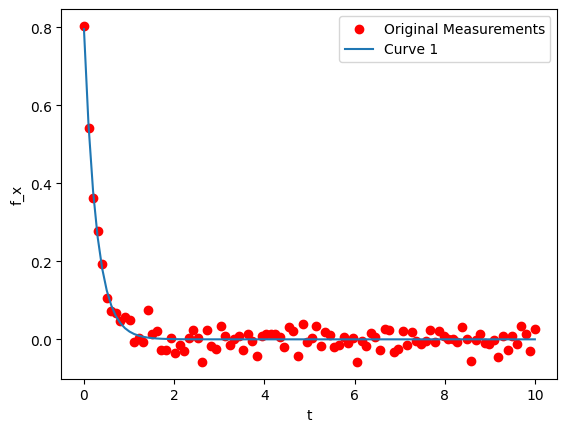

In [26]:
# Plotting
plt.scatter(t, N, label='Original Measurements', color='red')
plt.plot(t, g(x_op[0], t), label="Curve 1")
plt.xlabel('t')
plt.ylabel('f_x')
plt.legend()
plt.show()


### Study the influence of noise


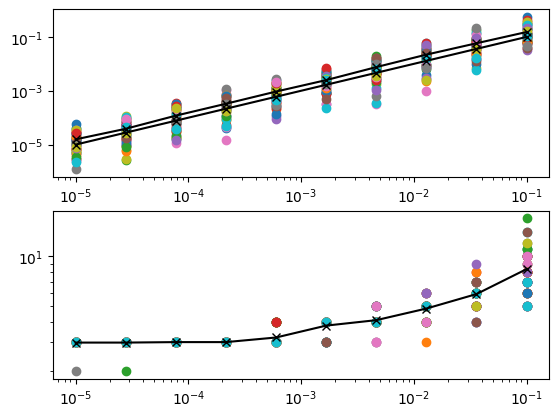

In [40]:
def make_data(t,sigma,x):
    p=len(t)
    d=np.random.normal(0,sigma,p) # adding Gaussian noise
    N=g(x,t)  # Values created by the model
    N=N+d    # add a random noise to make the measurements "realistic"
    return N
p=100
t=np.linspace(0,20,p)
x_true=np.array([1.,3.8])
lnoise=10
noise=np.logspace(-5,-1,lnoise)
eps=1.e-6
k_max=1000
ntrials=50
success=0
m_error=np.zeros(lnoise)
m_iter=np.zeros(lnoise)
for trial in range(ntrials):
    error=np.zeros(lnoise)
    iter=np.zeros(lnoise)
    for isig in range(lnoise):
        N=make_data(t,noise[isig],x_true)
        x_op = FP_Gauss_Newton(x_init, eps, t, N,k_max)
#    print(x_op)
        error[isig]=np.linalg.norm(x_op[0]-x_true)/np.linalg.norm(x_true)
        iter[isig]=x_op[1]
    if np.max(iter)<k_max:
        m_error=m_error+error
        m_iter=m_iter+iter
        success+=1        
        plt.subplot(2,1,1)
        plt.plot(noise,error,'o')
        plt.subplot(2,1,2)
        plt.plot(noise,iter,'o')
m_error=m_error/success
m_iter=m_iter/success
plt.subplot(2,1,1)
plt.loglog(noise,m_error,'-xk')
plt.loglog(noise,noise,'-xk')
plt.subplot(2,1,2)
plt.loglog(noise,m_iter,'-xk')


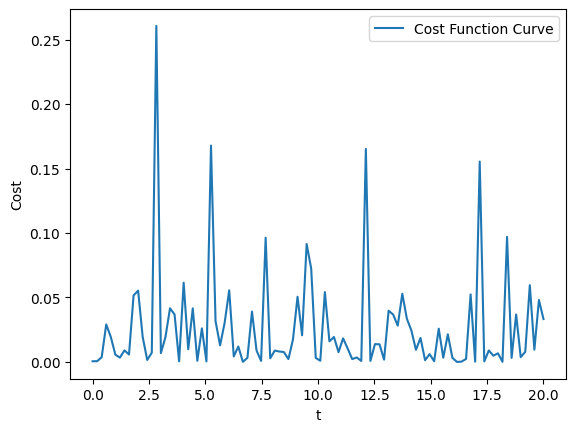

[ 0.00323542 -0.00328055 -0.00857308  0.02412317  0.01970912 -0.01061288
 -0.00817402  0.01337487  0.01071214  0.032109    0.03325521 -0.01970049
 -0.00549026 -0.01196278  0.07219369  0.0117133   0.01961992 -0.02884475
 -0.02714447  0.0029754  -0.03505194 -0.01401179 -0.02882302  0.00416011
  0.02281685  0.00283049 -0.0579326   0.02512587 -0.01600782 -0.02468657
  0.03332455  0.0092362  -0.01545437  0.00133105  0.00794614 -0.02794675
  0.01333182 -0.00389396 -0.04388315  0.00748766  0.01326842  0.01269902
  0.01239438  0.00662861 -0.01866584  0.03179575  0.02033227 -0.04276439
  0.03805268 -0.00786322  0.00428455  0.03291154 -0.01788073  0.0196605
  0.01231811 -0.01912057 -0.01448206  0.00665164 -0.0082927   0.00390158
 -0.05747235 -0.00395523 -0.01662319  0.01652537  0.00593221 -0.02817514
  0.02710527  0.02371408 -0.0325034  -0.02592017  0.02206679 -0.01370485
  0.01929085 -0.00520762 -0.01098917 -0.00322762  0.02271572 -0.00808187
  0.02069442  0.0079978  -0.00018313  0.00212917 -0.

In [35]:
# Plotting the cost function for each variation of noise
plt.plot(t, [cost_function(x_init, cost_init, t, g(x_init, t) + d, k_max) for d in d], label="Cost Function Curve")
plt.xlabel('t')
plt.ylabel('Cost')
plt.legend()
plt.show()
print(d)